In [3]:
import sys

# Replace this with the path to the repository
sys.path.append("/home/zhenhao/ETFMH/")

In [4]:
from db_sketching.kmer_set import KMerSet, FracMinHash
from Bio import SeqIO

# Path to the datasets we are testing
data_1 = ["../data/562.fna"]
data_2 = ["../data/564.fna"]

# The boolean function used in FracMinHash
def cond(kmer_hash):
    hash = (976369 * kmer_hash + 1982627) % 10000
    if hash < 100:
        return True
    else:
        return False

containment = []
ANI = []
set_size = []

for k in range(8, 52):    
    frac1 = FracMinHash(cond, k)
    frac2 = FracMinHash(cond, k)

    # insert dataset
    frac1.insert_file_list(data_1)
    frac2.insert_file_list(data_2)

    # Calculate containment index and estimate ANI
    containment.append(frac1.containment(frac2))
    ANI.append(frac1.ANI_estimation(frac2))

    # Record the size of k-mer set as well
    set_size.append(len(frac1.set))

    print(f"k: {k},\tSet size: {set_size[-1]},\tcontainment: {containment[-1]},\tANI: {ANI[-1]}")


k: 8,	Set size: 333,	containment: 1.0,	ANI: 1.0


KeyboardInterrupt: 

In [20]:
import pandas as pd
import numpy as np

# Put all results into a dataframe
res = pd.DataFrame({"k": np.arange(8, 52), "set size": set_size, "containment": containment, "Estimated ANI": ANI})

<Axes: xlabel='k', ylabel='Estimated ANI'>

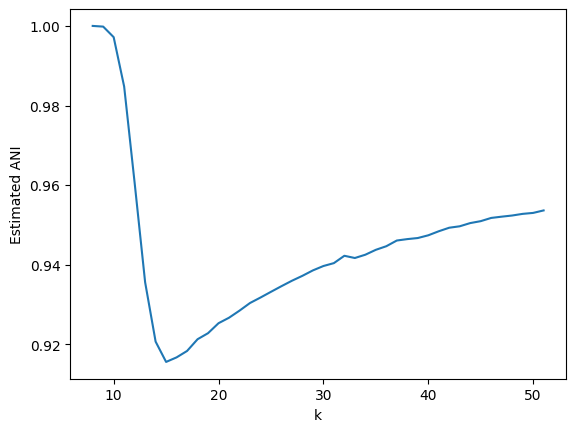

In [26]:
import seaborn as sns

sns.lineplot(res, x="k", y="Estimated ANI")

<Axes: xlabel='k', ylabel='containment'>

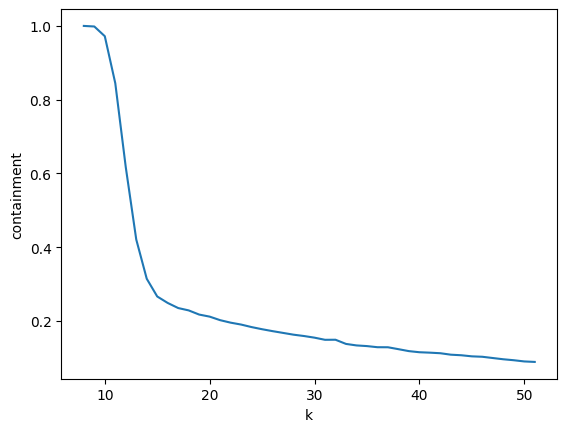

In [27]:
sns.lineplot(res, x="k", y="containment")

<Axes: xlabel='k', ylabel='set size'>

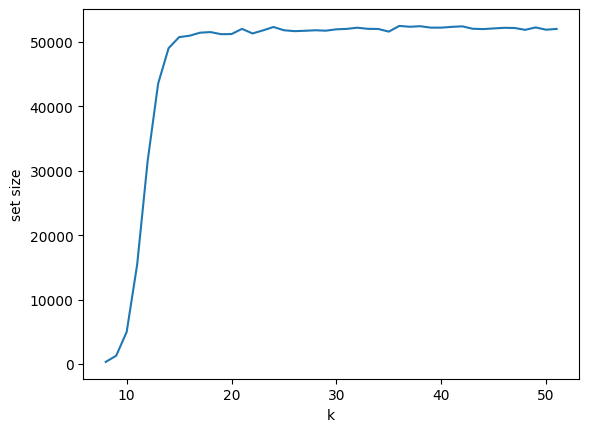

In [28]:
sns.lineplot(res, x="k", y="set size")